In [52]:
#導入
# numpy: 用於進行數值計算和數組操作。
# pandas: 用於數據處理和數據分析。
# matplotlib: 用於繪製圖表和資料視覺化。
# seaborn: 也是用於資料視覺化和繪製統計圖表的套件。
# sklearn.preprocessing: 用於數據預處理，例如標準化和歸一化等。
# scipy: 用於科學計算和統計分析。
# scipy.stats: 用於機率分布、統計分析等相關的統計計算。
# warnings: 用於控制警告訊息的輸出，通常是用來屏蔽一些不必要的警告訊息，讓程式執行過程更加乾淨。
#%matplotlib inline顯示matplotlib繪製的圖表
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#讀取訓練數據
train = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM-1\1\A26m2 25度(dry).csv")
train1 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM-1\1\A26m2 50度(dry).csv")
train2 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM-1\1\A26m5_25c.csv")
train3 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM-1\1\A26m5_50c.csv")
train4 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM-1\1\A26m8 25度(dry).csv")
train5 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM-1\1\A26m8 50度(dry).csv")
print (train)
train.head(5)



                     File       hc(nm)       Pmax(煮)    S(煮/nm)       A(nm^2)  \
0    PA26-2_25蚓_00000.hys    81.213663     29.127181   0.553857  6.492780e+04   
1    PA26-2_25蚓_00000.hys   135.152547     46.652097   0.589053  1.344998e+05   
2    PA26-2_25蚓_00000.hys   207.661511     68.294118   0.641284  2.726433e+05   
3    PA26-2_25蚓_00000.hys   289.289906     95.022240   0.662865  4.832191e+05   
4    PA26-2_25蚓_00000.hys   390.208515    127.067438   0.752592  8.162548e+05   
..                    ...          ...           ...        ...           ...   
445  PA26-2_25蚓_00008.hys  5531.417975   9548.829162  12.361213  9.532367e+07   
446  PA26-2_25蚓_00008.hys  5616.703429  10011.995040  12.448198  9.809110e+07   
447  PA26-2_25蚓_00008.hys  5705.463081  10488.036230  12.576816  1.010121e+08   
448  PA26-2_25蚓_00008.hys  5800.786682  10976.587920  12.809990  1.041955e+08   
449  PA26-2_25蚓_00008.hys  5807.537071  11137.793010  12.300634  1.044227e+08   

        hmax(nm)     heff(n

,File,hc(nm),Pmax(煮),S(煮/nm),A(nm^2),hmax(nm),heff(nm),Er(GPa),H(GPa),A,hf(nm),m,X(mm),Y(mm),Drift(nm/s)
0,PA26-2_25蚓_00000.hys,81.213663,29.127181,0.553857,64927.79999,6294.4456,120.655925,1.925828,0.448609,0.008253,26.199745,1.796097,-135.240795,-105.515106,2.203083
1,PA26-2_25蚓_00000.hys,135.152547,46.652097,0.589053,134499.83890,6294.4456,194.551355,1.423078,0.346856,0.007314,54.214112,1.771970,-135.240795,-105.515106,2.203083
2,PA26-2_25蚓_00000.hys,207.661511,68.294118,0.641284,272643.33040,6294.4456,287.533411,1.088148,0.250489,0.003792,90.098284,1.853923,-135.240795,-105.515106,2.203083
3,PA26-2_25蚓_00000.hys,289.289906,95.022240,0.662865,483219.13820,6294.4456,396.803076,0.844866,0.196644,0.022179,174.895504,1.548003,-135.240795,-105.515106,2.203083
4,PA26-2_25蚓_00000.hys,390.208515,127.067438,0.752592,816254.84010,6294.4456,516.838295,0.738043,0.155671,0.003596,208.347029,1.827125,-135.240795,-105.515106,2.203083


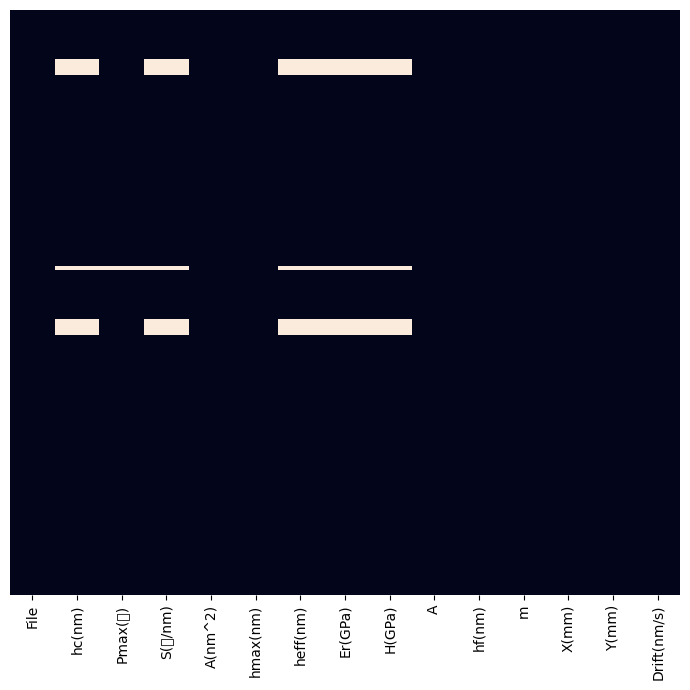

In [53]:
#isnull()看數據缺失值
# yticklabels=False 和 cbar=False 表示去掉熱力圖的 y 軸標籤和顏色條
plt.figure(figsize=(7,7)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [54]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(450, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   File         450 non-null    object 
 1   hc(nm)       423 non-null    float64
 2   Pmax(煮)      447 non-null    float64
 3   S(煮/nm)      423 non-null    float64
 4   A(nm^2)      450 non-null    float64
 5   hmax(nm)     450 non-null    float64
 6   heff(nm)     423 non-null    float64
 7   Er(GPa)      423 non-null    float64
 8   H(GPa)       423 non-null    float64
 9   A            450 non-null    float64
 10  hf(nm)       450 non-null    float64
 11  m            450 non-null    float64
 12  X(mm)        450 non-null    float64
 13  Y(mm)        450 non-null    float64
 14  Drift(nm/s)  450 non-null    float64
dtypes: float64(14), object(1)
memory usage: 52.9+ KB


In [55]:
train = train.drop(train[(train['hc(nm)']<4000) & (train['Er(GPa)']>20)].index)

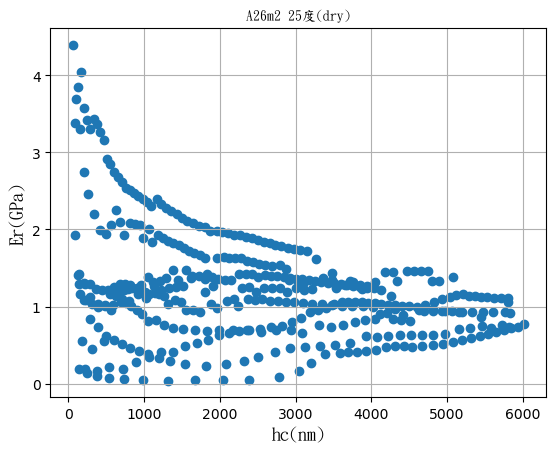

In [56]:
# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train['hc(nm)'], y=train['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m2 25度(dry)', fontsize=15, fontproperties=font)

plt.show()


In [57]:
train1 = train1.drop(train1[(train1['hc(nm)']<5000) & (train1['Er(GPa)']>20)].index)

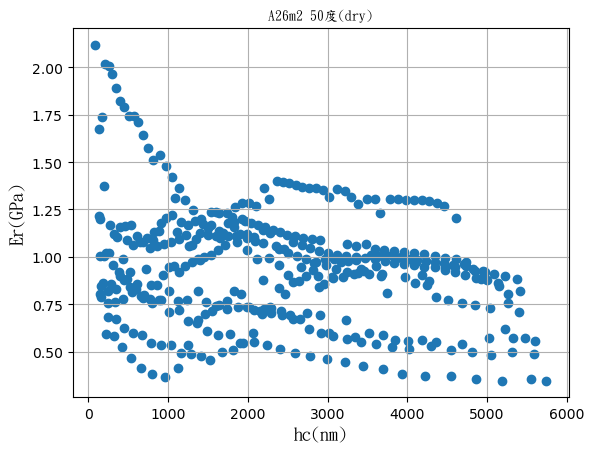

In [58]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train1['hc(nm)'], y=train1['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m2 50度(dry)', fontsize=15, fontproperties=font)

plt.show()


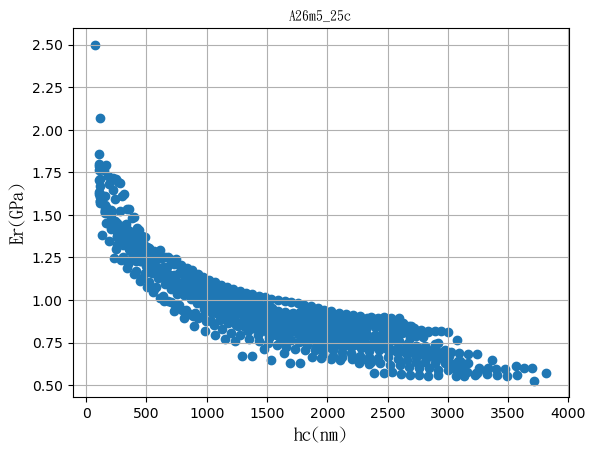

In [59]:
# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train2['hc(nm)'], y=train2['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m5_25c', fontsize=15, fontproperties=font)

plt.show()


In [60]:
train3 = train3.drop(train3[(train3['hc(nm)']<6000) & (train3['Er(GPa)']>20)].index)

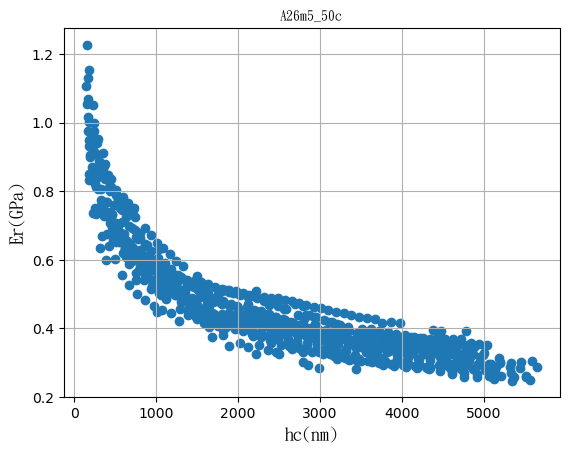

In [61]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train3['hc(nm)'], y=train3['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m5_50c', fontsize=15, fontproperties=font)

plt.show()


In [62]:
train4 = train4.drop(train4[(train3['hc(nm)']<6000) & (train4['Er(GPa)']>20)].index)

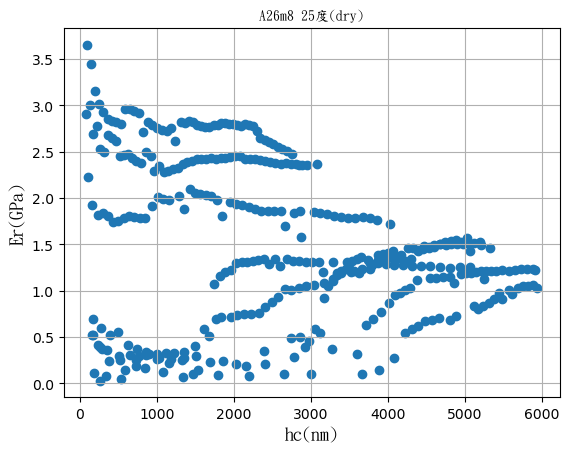

In [63]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train4['hc(nm)'], y=train4['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m8 25度(dry)', fontsize=15, fontproperties=font)


# # 設置 X 軸範圍到 0 到 6000
# ax.set_xlim(0, 6000)

# # 設置 Y 軸範圍到 0 到 35
# ax.set_ylim(0, 35)

plt.show()


In [64]:
train5 = train5.drop(train5[(train5['hc(nm)']<6000) & (train5['Er(GPa)']>20)].index)

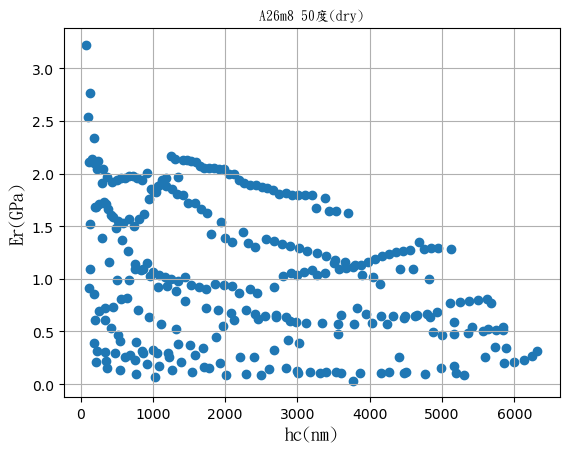

In [65]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train5['hc(nm)'], y=train5['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m8 50度(dry)', fontsize=15, fontproperties=font)

plt.show()


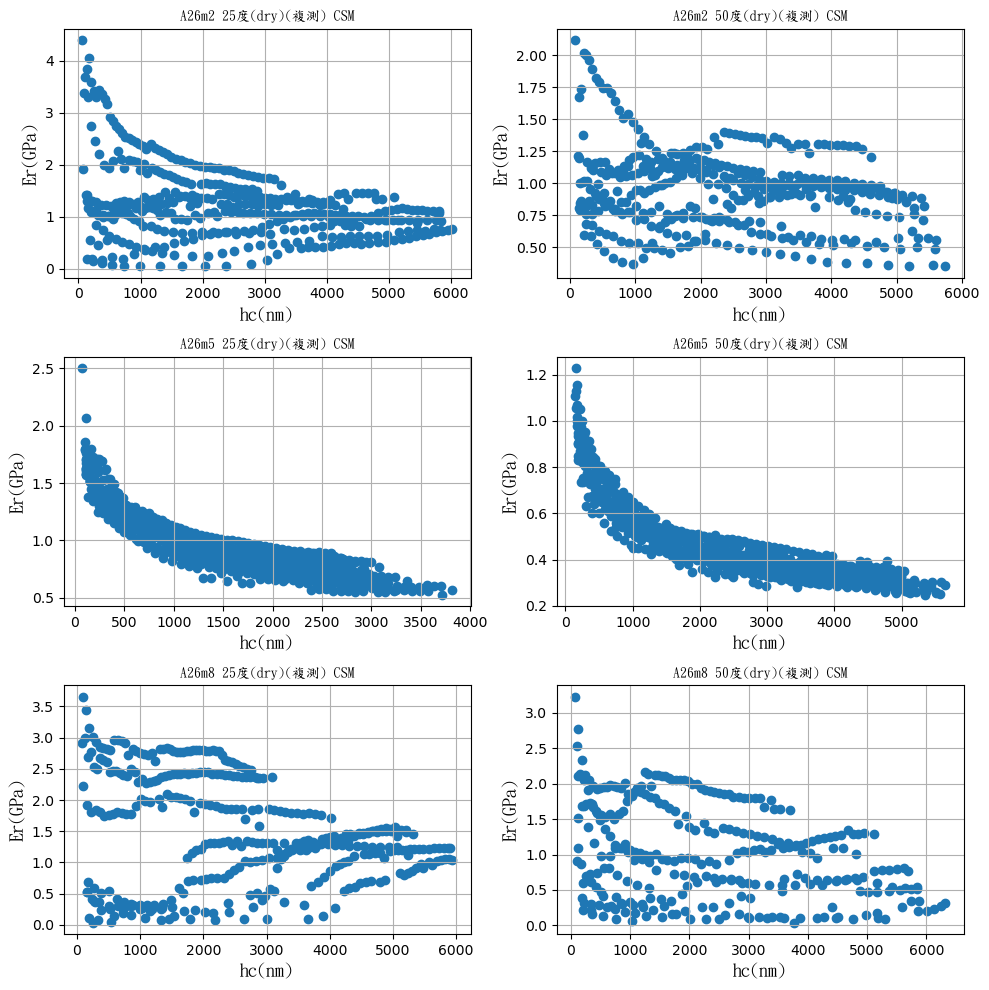

In [66]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# 數據列表
datasets = [train, train1, train2, train3, train4, train5]
titles = ['A26m2 25度(dry)(複測) CSM', 'A26m2 50度(dry)(複測) CSM', 'A26m5 25度(dry)(複測) CSM', 'A26m5 50度(dry)(複測) CSM', 'A26m8 25度(dry)(複測) CSM', 'A26m8 50度(dry)(複測) CSM']

# 繪製疊圖
for i, ax in enumerate(axs.flat):
    ax.scatter(x=datasets[i]['hc(nm)'], y=datasets[i]['Er(GPa)'])
    ax.grid(True)
    ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
    ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
    ax.set_title(titles[i], fontsize=15, fontproperties=font)

# 調整子圖之間的間距
plt.tight_layout()

# 顯示圖形
plt.show()


ValueError: The data contains non-finite values.

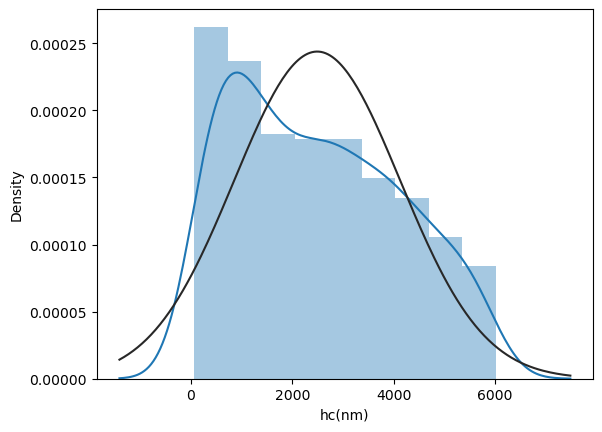

In [67]:
#分析目標變量'SalePrice'的分布，計算均值與標準差
sns.distplot(train['hc(nm)'] , fit=norm);  #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)

(mu, sigma) = norm.fit(train['hc(nm)'])  #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:態分布的標準差。
print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],  #plt.legend用於給圖標添加圖例，
            loc='best')  #loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()   #創建一個新的圖形窗口
res = stats.probplot(train['hc(nm)'], plot=plt)  #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
plt.show()